# 머신러닝 프로젝트

# 1.성능평가 기법

## 1.1 회귀분석

### MAE(Mean Absolute Error)
- 특징  
    - 에러의 크기 그대로 반영
    - 이상치에 영향을 받음

In [ ]:
from sklearn.metrics import maen_absolute_error
mae = maen_absolute_error(y_test, y_pred)

### MSE(Mean Squared Error)
- 특징
    - 실젯값과 예측값 차이의 면접 합
    - 특이값이 존재하면 수치 증가

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)

### RMSE(Root Mean Squared Error)

- 특징 
    - 에러를 제곱하여 계산할때 에러가 클수록 더 크게 반영되는 문제 발생
    - 이를 방지하기 위해 Root를 사용하여 오류값이 더 커지지 않도록 장치

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

### MSLE(Mean Squared Log Error)
- 특징
    - RMSE와 같이 손실이 기하급수적으로 증가하는 상황에서 실제 오류평균보다 값이 더 커지지 않도록 상쇄하기 위해 사용

In [ ]:
from sklearn.metrics import mean_squared_log_error
msle = mean_squared_log_error(y_test, y_pred)

### MAPE(Mean Absolute Percentage Error)
- 특징
    - 오차가 예측값에서 차지하는 정도를 나타냄

In [ ]:
import numpy as np
def MAPE(y_test, y_pred):
    mape = np.mean(np.abs((y_test - y_pred)/y_test)) * 100
    return mape

mape = MAPE(y_test, y_pred)

## 1.2 분류분석

### 정확도(Accuracy)

Accuracy = (TP+TF) / (TP+TN+FP+FN)

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)

### 혼동행렬(Confusion Matrix)

In [ ]:
from sklearn.metrics import confusion_matrix
cm  = confusion_matrix(y_test, y_pred)

### 정밀도(Precision)와 재현율(Recall)

#### 정밀도(Precision)
설명: Positive로 예측한 것들 중 실제로도 Positive인 비율

Precision = TP / (TP+FP)

In [ ]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)

#### 재현율(Recall)
설명: 실제로 Positive 것들 중 Positive로 예측한 비율

Recall = TP / (FN+TP)

In [ ]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)

#### F1 스코어

설명: 실제 Positive인 것들 중 Positive로 예측한 것들의 비율

F1 = 2*(Precision * Recall) / (Precision + Recall)

In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)

#### ROC-AUC

##### ROC곡선

설명: FPR(False Positive Rate)이 변할 때 TPR(True Positive Rate)이 변하는 것을 나타내는 곡선 (ROC)

TNR = TN / (FP + TN)

FPR = FP / (FP + TN) = 1 - TNR

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thres = roc_curve(y_test, y_pred, pos_label = 1)
# 곡선 그리기
from matplotlib import pyplot as plt

plt.plot(fpr, tpr)

##### AUC곡선
설명 : ROC곡선 아래의 면적이며, 1에 가까울수록 성능이 높은것을 나타냄

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thres = roc_curve(y_test, y_pred, pos_label = 1)
# AUC 값
auc = auc(fpr, tpr)

# 2.분석과정 빠르게 맛보기

## 2.1 회귀분석

### 데이터확인

In [8]:
# 보스톤 주택가격 
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()
boston_dt = boston.data
price = boston.target

df = pd.DataFrame(boston_dt, columns = boston.feature_names)
df['PRICE'] = price
df.head()

/Users/xper100/opt/anaconda3/envs/orderhero/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
df.shape

(506, 14)

In [10]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

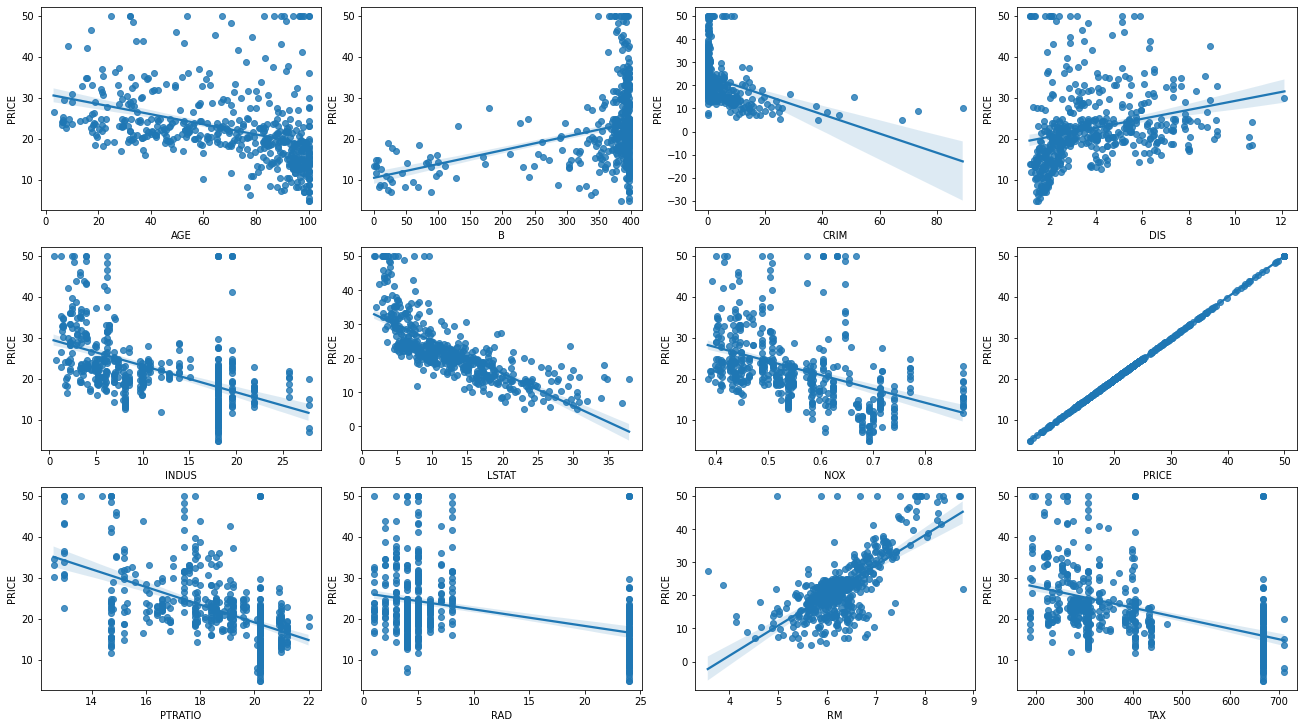

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# 3개의 행과 4개의 열을 가진 subplot 그리기
fig, axes = plt.subplots(figsize = (18,10), ncols = 4, nrows = 3, constrained_layout = True)
features = df.columns.difference(['PRUCE', 'CHAS'])

for i, feature in zip(range(12), features):
    row = int(i/4) # 행번호 설정
    col = i%4 # 열번호 설정

    # seaborn의 regplot을 이용해 산점도와 선형 회귀직선을 함계 시각화함
    sns.regplot(x = feature, y =df['PRICE'], data = df, ax = axes[row][col])

### 데이터분할

Traning, Test, validation 세트로 나누기

In [15]:
from sklearn.model_selection import train_test_split
x = df[['CRIM', 'ZN' , 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']].values
y = df['PRICE'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [20]:
print(f'학습데이터세트 PRICE 평균 : {y_train.mean()}')

print(f'평가데이터세트 PRICE 평균 : {y_test.mean()}')

학습데이터세트 PRICE 평균 : 22.796534653465343
평가데이터세트 PRICE 평균 : 21.488235294117644


### 전처리

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)

### 모델학습

In [23]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()

# 모델 학습 진행
linear.fit(x_train_scaled, y_train)

# 모델 성능 확인
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
pred_train = linear.predict(x_train_scaled)

mae = mean_absolute_error(y_train, pred_train)
mse = mean_squared_error(y_train, pred_train)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, pred_train)

print('MAE: {0: .5f}'.format(mae))
print('MSE: {0: .5f}'.format(mse))
print('RMSE: {0: .5f}'.format(rmse))
print('R2: {0: .5f}'.format(r2))

MAE:  3.32616
MSE:  22.11246
RMSE:  4.70239
R2:  0.74546


### 성능평가 및 예측값 저장

In [24]:
x_test_scaled = scaler.transform(x_test)
pred = linear.predict(x_test_scaled)

mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)

print('MAE: {0: .5f}'.format(mae))
print('MSE: {0: .5f}'.format(mse))
print('RMSE: {0: .5f}'.format(rmse))
print('R2: {0: .5f}'.format(r2))

MAE:  3.23724
MSE:  24.63539
RMSE:  4.96341
R2:  0.66406


In [25]:
pred_df = pd.DataFrame(pred, columns = ['Pred Price'])
pred_df.head()

,Pred Price
0,29.218660
1,33.551467
2,14.810658
3,25.084725
4,19.173927


In [26]:
actual = pd.DataFrame(y_test, columns = ['Actual Price'])
actual.head()

,Actual Price
0,23.6
1,32.4
2,13.6
3,22.8
4,16.1


In [27]:
reg_result = pd.concat([pred_df, actual], axis = 1)
reg_result.head()

,Pred Price,Actual Price
0,29.218660,23.6
1,33.551467,32.4
2,14.810658,13.6
3,25.084725,22.8
4,19.173927,16.1


## 2.2 분류분석

### 데이터확인

In [28]:
from json import load
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
iris_dt = iris.data
iris_label = iris.target

df = pd.DataFrame(data = iris_dt, columns = iris.feature_names)
df['label'] = iris_label

In [29]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 데이터 분할

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(iris_dt, iris_label, test_size = 0.2, random_state = 0, stratify=iris_label)

### 전처리

In [31]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
label                0
dtype: int64

### 모델학습

In [32]:
from sklearn.tree import DecisionTreeClassifier
dtree_clf_5 = DecisionTreeClassifier(max_depth=5, random_state = 100)
dtree_clf_3 = DecisionTreeClassifier(max_depth=3, random_state=100)
dtree_clf_1 = DecisionTreeClassifier(max_depth=1, random_state = 100)

from sklearn.model_selection import cross_val_score
import numpy as np
scores = cross_val_score(dtree_clf_5, x_train, y_train, scoring = 'accuracy', cv = 10)
print('교차검증 정확도: ', np.round(scores,3))
print('평균 검증 정확도: ', np.round(np.mean(scores), 4))

교차검증 정확도:  [0.917 1.    0.917 1.    1.    0.833 1.    0.917 1.    0.833]
평균 검증 정확도:  0.9417


In [33]:
scores = cross_val_score(dtree_clf_3, x_train, y_train, scoring = 'accuracy', cv = 10)
print('교차검증 정확도: ', np.round(scores,3))
print('평균 검증 정확도: ', np.round(np.mean(scores), 4))

교차검증 정확도:  [0.917 1.    0.917 0.917 1.    0.833 1.    0.917 0.917 0.833]
평균 검증 정확도:  0.925


In [34]:
scores = cross_val_score(dtree_clf_1, x_train, y_train, scoring = 'accuracy', cv = 10)
print('교차검증 정확도: ', np.round(scores,3))
print('평균 검증 정확도: ', np.round(np.mean(scores), 4))

교차검증 정확도:  [0.667 0.667 0.667 0.667 0.667 0.667 0.667 0.667 0.667 0.667]
평균 검증 정확도:  0.6667


### 성능평가 및 예측값 저장

In [35]:
dtree_clf_5.fit(x_train, y_train)
pred = dtree_clf_5.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9666666666666667